In [1]:
import numpy as np
import sys
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import skimage

sys.path.append(os.path.abspath('../'))
from utils import ext_transforms as et

from datasets import VOCSegmentation_polypGen2021 as polyGenSeg

In [2]:
# train_transform = et.ExtCompose([
# #              et.ExtRandomScale((0.5, 2.0)),
# #             et.ExtRandomCrop(size=(512, 512), pad_if_needed=True),
# #             et.ExtRandomHorizontalFlip(),
#         ])

train_dst = polyGenSeg(
        root=f"/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/EndoCV2021/trainData_polypGen/",
        image_set='train_polypGen',
        download=False,
        transform=None,
        epi_dims=None,
        indices=False,
        extra_C6=29,
    )

/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/EndoCV2021/trainData_polypGen/trainVal/train_polypGen.txt
135
/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/EndoCV2021/trainData_polypGen/C6_additional/images/EndoCV2023_053735_16830.jpg
135
/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/EndoCV2021/trainData_polypGen/C6_additional/masks/EndoCV2023_053735_16830.jpg


In [102]:
def detect_imgs(infolder, imgslist=[], ext='.jpg'):
    import os

    if len(imgslist):
        flist = [im.split("/")[-1].split(".")[0] + "_mask.jpg" for im in imgslist]
        return np.array([os.path.join(infolder, f) for f in flist])
        
    else:
        items = os.listdir(infolder)
        flist = []
        for names in items:
            if names.endswith(ext) or names.endswith(ext.upper()):
                flist.append(os.path.join(infolder, names))

        return np.sort(flist)

TEST_SETS = "D4"

for TEST_SET in ["C6", "D3"]:
dirs = {
    "C6": [
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/EndoCV2021/data_C6/images_C6/",
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/EndoCV2021/data_C6/masks_C6/",
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/predictions/images_C6_predictions/splendid-yogurt-28/",
    ],
    "D3": [
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/endocv2021-test-noCopyAllowed-v3_confidential/EndoCV_DATA3/",
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/endocv2021-test-noCopyAllowed-v3_confidential/segmentation/EndoCV_DATA3_GT/",
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/predictions/images_EndoCV_DATA3/",
    ],
    "D4": [
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/endocv2021-test-noCopyAllowed-v3_confidential/EndoCV_DATA4/",
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/endocv2021-test-noCopyAllowed-v3_confidential/segmentation/EndoCV_DATA4_GT",
        "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/predictions/images_EndoCV_DATA4/",
    ]
}

imagelist = detect_imgs(dirs[TEST_SET][0])

if TEST_SET != "C6":
    gtlist = detect_imgs(dirs[TEST_SET][1], imgslist=imagelist)
else:
    gtlist = detect_imgs(dirs[TEST_SET][1])
predlist = detect_imgs(dirs[TEST_SET][2])

print(len(imagelist), len(gtlist), len(predlist))

moment_path = "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/moments/splendid-yogurt-28/"

# test
epis = {
    "C6": np.load(f"{moment_path}epis_C6_pred.npy"),
    "D3": np.load(f"{moment_path}epis_EndoCV_DATA3.npy"),
    "D4": np.load(f"{moment_path}epis_EndoCV_DATA4.npy"),
}

# loop through and display: original image (without transform), target mask, pred mask, and epi mask.

ROWS_TO_SHOW = 20
COLS_TO_SHOW = 4
fig, axes = plt.subplots(nrows=ROWS_TO_SHOW, ncols=COLS_TO_SHOW, figsize=(4*COLS_TO_SHOW, 4*ROWS_TO_SHOW))
axes = axes.flatten()

column_titles = ["Image", "GT Mask", "Predicted Mask", "Uncertainty"]

for i in range(COLS_TO_SHOW):
    axes[i].set_title(column_titles[i], fontsize=15)

count = 0
for row in range(ROWS_TO_SHOW):
    pred = np.array(Image.open(predlist[count]).convert('RGB').resize((512,512), resample=0))
    images = [
        Image.open(imagelist[count]).convert('RGB').resize((512,512), resample=0), 
        Image.open(gtlist[count]).convert('RGB').resize((512,512), resample=0),
        np.where(pred, 1., 0.),
        epis[TEST_SET][count],
    ]
    for col_id in range(COLS_TO_SHOW):
        cmap = "gray" if col_id > 0 else None
        axes[(row*4) + col_id].imshow(images[col_id], cmap=cmap)
        axes[(row*4) + col_id].axis('off')

    count += 1
    
plt.tight_layout()
plt.savefig(f'{moment_path}grid_{TEST_SET}_{ROWS_TO_SHOW}.pdf', format='pdf')
# plt.show()


In [4]:
moment_path = "/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/moments/fresh-paper-72/"
epis = np.load(moment_path + "epis.npy")
preds = np.load(moment_path + "preds.npy")
targets = np.load(moment_path + "targets.npy")

On train set...

In [5]:
train_dst.images[0]

'/Users/ysbecca/ysbecca-projects/BayPolypGen-Benchmark/datasets/EndoCV2021/trainData_polypGen/images_polypGen/726OLCV1_100H0006.jpg'

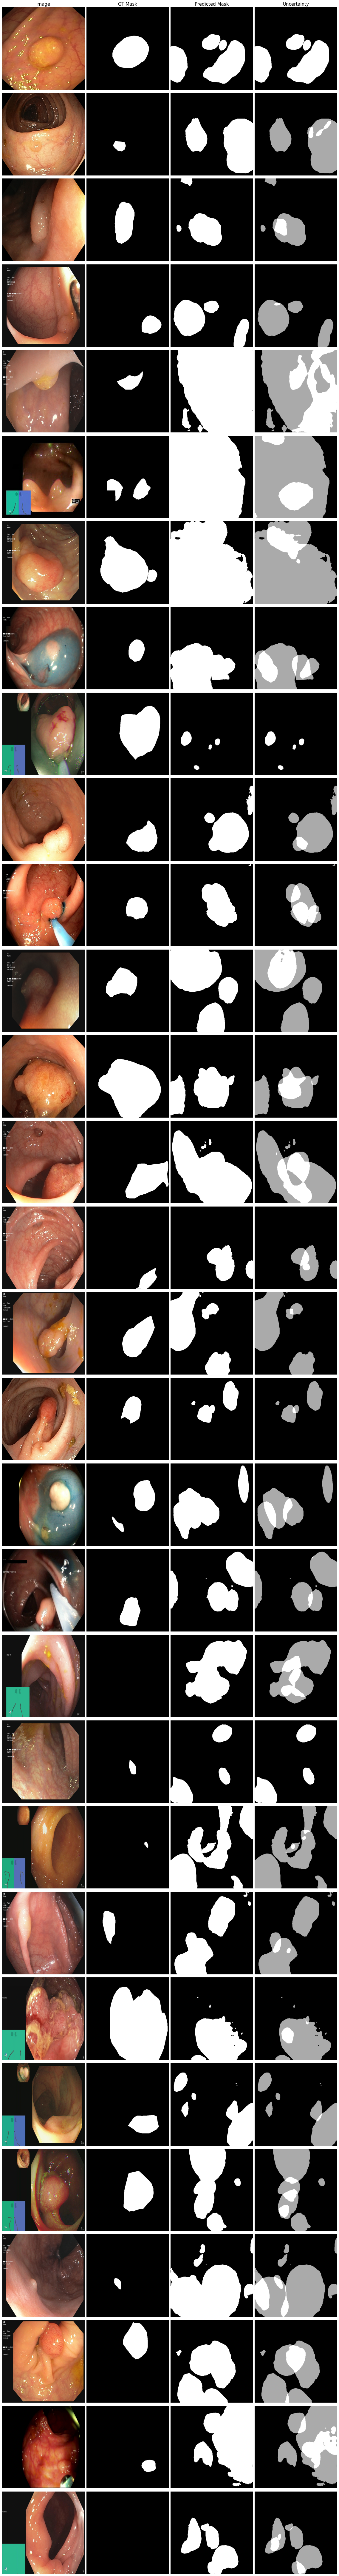

In [8]:
START_INDEX = 0
ROWS_TO_SHOW = 30
COLS_TO_SHOW = 4
fig, axes = plt.subplots(nrows=ROWS_TO_SHOW, ncols=COLS_TO_SHOW, figsize=(4*COLS_TO_SHOW, 4*ROWS_TO_SHOW))
axes = axes.flatten()

column_titles = ["Image", "GT Mask", "Predicted Mask", "Uncertainty"]

for i in range(COLS_TO_SHOW):
    axes[i].set_title(column_titles[i], fontsize=15)

count = 0
for row in range(ROWS_TO_SHOW):
    pred = np.array(Image.fromarray(preds[START_INDEX + count]).convert('RGB').resize((512,512), resample=0))
    images = [
        Image.open(train_dst.images[count + START_INDEX]).convert('RGB').resize((512,512), resample=0), 
        Image.open(train_dst.masks[count + START_INDEX]).convert('RGB').resize((512,512), resample=0),
        np.where(pred, 1., 0.),
        epis[count + START_INDEX],
    ]
    for col_id in range(COLS_TO_SHOW):
        cmap = "gray" if col_id > 0 else None
        axes[(row*4) + col_id].imshow(images[col_id], cmap=cmap)
        axes[(row*4) + col_id].axis('off')

    count += 1
    
plt.tight_layout()
# plt.savefig(f'{moment_path}grid_{TEST_SET}_{ROWS_TO_SHOW}.pdf', format='pdf')
plt.show()

In [19]:
epis.mean(axis=(1, 2)).shape

(1188,)

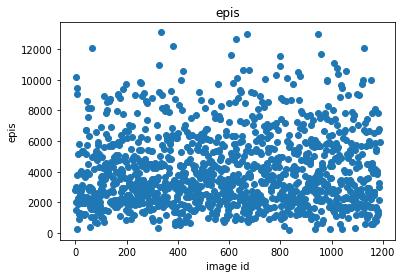

In [20]:
# Create scatter plot
plt.scatter(list(range(len(epis))), epis.mean(axis=(1, 2)))

# Set labels and title
plt.xlabel('image id')
plt.ylabel('epis')
plt.title('epis')

# Display the plot
plt.show()
